In [85]:
#pip install cufflinks

In [19]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import init_notebook_mode, iplot
import plotly.figure_factory as ff
import cufflinks
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')
import plotly
from plotly import tools
pd.set_option('display.max_columns', 100)
import plotly.offline as py
import plotly.graph_objs as go



In [20]:
df = pd.read_csv('train.csv')

In [21]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [22]:
df.drop('Id', axis=1, inplace= True)

In [23]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [24]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0


In [25]:
table_cat = ff.create_table(df.describe(include=['O']).T, index=True, index_title='Categorical columns')
iplot(table_cat)

HISTOGRAMA

Vou plotar um histograma de SaleProce de tdas as casas do Dataset.

In [30]:
df['SalePrice'].iplot(
   kind = 'hist',
    bins = 100,
    xTitle='price',
    linecolor='green',
    yTitle='count',
    title ='Histograma do preço de venda'
)

## BoxPlot

Plote um boxplot de SalePrice de todas as casas nos dados. Os boxplots não mostram a forma da distribuição, mas podem nos dar uma idéia melhor sobre o centro e a distribuição da distribuição, bem como sobre os possíveis outliers que possam existir. Boxplots e histogramas geralmente se complementam e nos ajudam a entender mais sobre os dados.

In [31]:
df['SalePrice'].iplot(kind = 'box', title='Caixa de Plotagem de SalePrice')

## Histogramas e Boxplots por Grupos

Traçando por grupos, podemos ver como uma variável muda em resposta a outra. Por exemplo, se houver uma diferença entre o SalePrice da casa com ou sem ar condicionado central. Ou se o preço de venda da casa variar de acordo com o tamanho da garagem e assim por diante.

> <bold>Boxplot e histograma do preço de venda da casa agrupados por com ou sem ar-condicionado

In [33]:
trace0 = go.Box(
    y=df.loc[df['CentralAir'] == 'Y']['SalePrice'],
    name = 'Com ar condicionado',
    marker = dict(
        color = 'rgb(214, 12, 140)',
    )
)
trace1 = go.Box(
    y=df.loc[df['CentralAir'] == 'N']['SalePrice'],
    name = 'Sem ar Condicionado',
    marker = dict(
        color = 'rgb(0, 128, 128)',
    )
)
data = [trace0, trace1]
layout = go.Layout(
    title = "Boxplot of Sale Price by air conditioning"
)

fig = go.Figure(data=data,layout=layout)
py.iplot(fig)

In [34]:
trace0 = go.Histogram(
    x=df.loc[df['CentralAir'] == 'Y']['SalePrice'], name='Com ar Condicionado Central',
    opacity=0.75
)
trace1 = go.Histogram(
    x=df.loc[df['CentralAir'] == 'N']['SalePrice'], name='Sem ar condicionado central ',
    opacity=0.75
)

data = [trace0, trace1]
layout = go.Layout(barmode='overlay', title='Histograma do preço de venda da casa com e sem ar condicionado central ')
fig = go.Figure(data=data, layout=layout)

py.iplot(fig)

Obviamente, o preço médio e mediano de venda de casas sem ar-condicionado é muito menor do que as casas com ar-condicionado.

>Boxplot e histograma do preço de venda da casa agrupados por tamanho de garagem

In [41]:
trace0 = go.Box(
    y=df.loc[df['GarageCars'] == 0]['SalePrice'],
    name = 'Sem Garagem',
    marker = dict(
        color = 'rgb(214, 12, 140)',
    )
)
trace1 = go.Box(
    y=df.loc[df['GarageCars'] == 1]['SalePrice'],
    name = '1- Vaga na Garagem',
    marker = dict(
        color = 'rgb(0, 128, 128)',
    )
)
trace2 = go.Box(
    y=df.loc[df['GarageCars'] == 2]['SalePrice'],
    name = '2- Vagas na Garagem',
    marker = dict(
        color = 'rgb(12, 102, 14)',
    )
)
trace3 = go.Box(
    y=df.loc[df['GarageCars'] == 3]['SalePrice'],
    name = '3 - Vagas na Garagem',
    marker = dict(
        color = 'rgb(10, 0, 100)',
    )
)
trace4 = go.Box(
    y=df.loc[df['GarageCars'] == 4]['SalePrice'],
    name = '4-Vagas na Garagem',
    marker = dict(
        color = 'rgb(100, 0, 10)',
    )
)
data = [trace0, trace1, trace2, trace3, trace4]
layout = go.Layout(
    title = "Preço das casas a venda pelo tamanho da garagem"
)

fig = go.Figure(data=data,layout=layout)
py.iplot(fig)

Quanto maior a garagem, maior o preço médio da casa, isso funciona até chegarmos à garagem para 3 carros. Aparentemente, as casas com garagens para 3 carros têm o preço médio mais alto, ainda mais alto do que as casas com garagem para 4 carros.

## Histograma do preço de venda da casa sem garagem

In [42]:
df.loc[df['GarageCars']==1]['SalePrice'].iplot(
kind='hist',
bins=50,
xTitle = 'price',
linecolor='black',
yTitle='count',
title='vendas de casas com apenas uma vaga na garagem ')

## HISTOGRAMA COM CASA A VENDA COM APENAS DUAS VAGAS NA GARAGEM

In [43]:
df.loc[df['GarageCars'] == 2]['SalePrice'].iplot(
    kind='hist',
    bins=100,
    xTitle='price',
    linecolor='black',
    yTitle='count',
    title='Casa com apenas duas vagas na garagem')

## HISTOGRAMA COM A CASA A VENDA COM TRÊS VAGAS NA GARAGEM

In [44]:
df.loc[df['GarageCars'] == 3]['SalePrice'].iplot(
    kind='hist',
    bins=50,
    xTitle='price',
    linecolor='black',
    yTitle='count',
    title='Casa a vanda com três vagas na garagem ')

## HISTOGRAMA COM CASA A VENDA COM QUATRO VAGAS NA GARAGEM

In [46]:
df.loc[df['GarageCars'] == 4]['SalePrice'].iplot(
    kind='hist',
    bins=10,
    xTitle='price',
    linecolor='black',
    yTitle='count',
    title='Casa a venda com 4 vagas na garagem')

### Tabela de frequência

A frequência nos diz com que frequência algo aconteceu. As tabelas de frequência nos fornecem um instantâneo dos dados para nos permitir encontrar padrões.

### Tabela de frequência de qualidade geral

In [47]:
x = df.OverallQual.value_counts()
x/x.sum()

5     0.271918
6     0.256164
7     0.218493
8     0.115068
4     0.079452
9     0.029452
3     0.013699
10    0.012329
2     0.002055
1     0.001370
Name: OverallQual, dtype: float64

## Tabela de fraquência do tamanho da garagem 

In [52]:
x = df.GarageCars.value_counts()
x/x.sum()

2    0.564384
1    0.252740
3    0.123973
0    0.055479
4    0.003425
Name: GarageCars, dtype: float64

## Tabela de frequência de central de ar condicionado

In [53]:
x = df.CentralAir.value_counts()
x/x.sum()

Y    0.934932
N    0.065068
Name: CentralAir, dtype: float64

## Resumos Numéricos

Uma maneira rápida de obter um conjunto de resumos numéricos para uma variável quantitativa é usar o método de descrição.

In [56]:
df.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

### Também podemos calcular estatísticas de resumo individuais de SalePrice.

In [60]:
print("O preço médio da venda: ", df.SalePrice.mean())
print("O preço médio da venda, - Função NUmpy: ", np.mean(df.SalePrice))
print("O preço médio da venda: ", df.SalePrice.median())
print("Percentil 50, igual a mediana: ", np.percentile(df.SalePrice, 50))
print("Percentil 75: ", np.percentile(df.SalePrice, 75))
print("Método Pandas para quantis, equivalente ao percentil 75: ", df.SalePrice.quantile(0.75))

O preço médio da venda:  180921.19589041095
O preço médio da venda, - Função NUmpy:  180921.19589041095
O preço médio da venda:  163000.0
Percentil 50, igual a mediana:  163000.0
Percentil 75:  214000.0
Método Pandas para quantis, equivalente ao percentil 75:  214000.0


Calcule a proporção das casas com preço de venda entre o 25º percentil (129975) e o 75º percentil (214000).

In [62]:
print('A proporção de casas com preço entre os percentis 25 e 75:',np.mean((df.SalePrice >= 129975) & (df.SalePrice <= 214000)))

A proporção de casas com preço entre os percentis 25 e 75: 0.5020547945205479


Calcule a proporção das casas com pés quadrados totais da área do porão entre o 25º percentil (795,75) e o 75º percentil (1298,25).

In [64]:
print('A Proporção de casas com pés quadrado totais da área do porão entre o percentil 25 e o percentil 75:', 
     np.mean((df.TotalBsmtSF >= 795.75) & (df.TotalBsmtSF <= 1298.25)))

A Proporção de casas com pés quadrado totais da área do porão entre o percentil 25 e o percentil 75: 0.5


Por fim, calculamos a proporção das casas com base em ambas as condições. Como algumas casas estão sob os dois critérios, a proporção abaixo é menor que a soma das duas proporções calculadas acima.

In [65]:
a = (df.SalePrice >= 129975) & (df.SalePrice <= 214000)
b = (df.TotalBsmtSF >= 795.75) & (df.TotalBsmtSF <= 1298.25)
print(np.mean(a | b))

0.7143835616438357


Calcular o preço de venda IQR para casa sem ar condicionado 

In [66]:
q75, q25 = np.percentile(df.loc[df['CentralAir']== 'N'] ['SalePrice'], [75,25])
iqr = q75 - q25
print('O preço de venda IQR para casa sem ar condicionado :', iqr)

O preço de venda IQR para casa sem ar condicionado : 46500.0


Calcular o preço de venda IQR para casa com ar condicionado

In [68]:
q75, q25 = np.percentile(df.loc[df['CentralAir']== 'Y']['SalePrice'], [75,25])
iqr = q75 - q25
print('Preço de venda IQR para casa com ar condicionado:', iqr)

Preço de venda IQR para casa com ar condicionado: 84410.0


## Estratificação

Outra maneira de obter mais informações de um conjunto de dados é dividi-las em subconjuntos menores e mais uniformes e analisar cada um desses "estratos" por conta própria. Criaremos uma nova coluna HouseAge, em seguida particionaremos os dados nos estratos HouseAge e construiremos gráficos de caixas lado a lado do preço de venda em cada estrato.

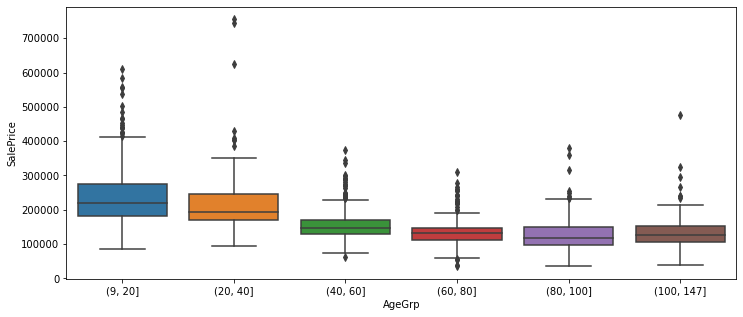

In [74]:
df['HouseAge'] = 2019 - df['YearBuilt']
df["AgeGrp"] = pd.cut(df.HouseAge,[9,20,40,60,80,100,147])# Criar estratos etários com base esses pontos de corte
plt.figure(figsize=(12,5))
sns.boxplot(x='AgeGrp', y='SalePrice', data= df );#utilizar o (;) some os dados de info

Quanto mais antiga a casa, menor o preço mediano, ou seja, o preço da casa tende a diminuir com a idade, até atingir 100 anos de idade. O preço médio das casas com mais de 100 anos é superior ao preço médio das casas com idade entre 80 e 100 anos.

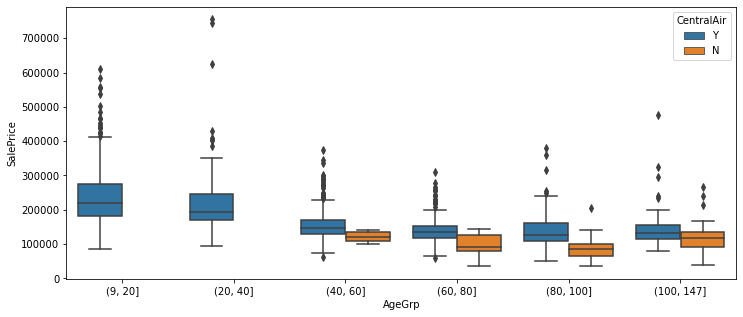

In [75]:
plt.figure(figsize = (12,5))
sns.boxplot(x='AgeGrp', y='SalePrice', hue='CentralAir', data=df)
plt.show();

Aprendemos anteriormente que o preço da habitação tende a diferir entre e sem ar-condicionado. No gráfico acima, também descobrimos que casas recentes (de 9 a 40 anos) estão todas equipadas com ar condicionado.

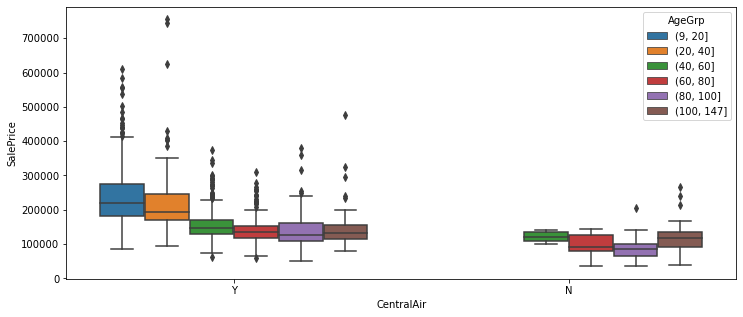

In [78]:
plt.figure(figsize=(12, 5))
sns.boxplot(x="CentralAir", y="SalePrice", hue="AgeGrp", data=df)
plt.show();

Agora, agrupamos primeiro por ar condicionado e, em seguida, dentro do grupo por faixas etárias. Cada abordagem destaca um aspecto diferente dos dados.
Também podemos estratificar conjuntamente a idade da casa e o ar-condicionado para explorar como o tipo de construção varia de acordo com esses dois fatores simultaneamente.